In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [6]:
import keras
from keras.models import Sequential
# sequential model is imported from keras
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
#layers- input and output layers
# Conv2D- create neural network
# flatten - dealing in 2d matrix convert 2d matrix into 1d array
# dense - processing layer
# max pooling layer - works with conv2d layer some layer are preferrred so we use pool 
# dropout - dropping out some useless features
from sklearn.metrics import accuracy_score
# how accurate our model will be after processing 

In [7]:
import ipywidgets as widgets
# for classification 
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
# for spillting the dataset into training set and testing set 
import cv2
from sklearn.utils import shuffle
# to shuffle into traing and test we use shuffle
import tensorflow as tf 

In [8]:
#   TRAIN TEST SPLIT
X_train=[]
Y_train=[]
#as all images are not of same size so seeting a size common to every traiing and testing input image 
image_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath =  os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    # listdr to read all the content of a particular directory
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath =  os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    # listdr to read all the content of a particular directory
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
# we will put the training as well as testing data into the X_train and Y_train and then after putting 
#    it in it we will seperate the tesing and the training data 
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [9]:
# shuffle them together as a key and value pair to maintain the accuracy
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)
X_train.shape
# 3264 - no of images
# 150x150 - size of each image
# 3 - RGB

(3264, 150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [11]:
X_train.shape+X_test.shape


(2937, 150, 150, 3, 327, 150, 150, 3)

In [12]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))
# 4 categories are there so 4 parameters
# dealing with probability so we use activation as softmax

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
# metrics can be loss or accuracy based on our requirements

In [16]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


2023-05-21 08:00:14.802414: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 16s 66ms/step - loss: 2.0216 - accuracy: 0.2872 - val_loss: 1.3627 - val_accuracy: 0.3776
Epoch 2/20
83/83 [==============================] - 4s 54ms/step - loss: 1.2924 - accuracy: 0.3787 - val_loss: 1.1762 - val_accuracy: 0.4898
Epoch 3/20
83/83 [==============================] - 4s 54ms/step - loss: 1.0555 - accuracy: 0.5422 - val_loss: 0.9439 - val_accuracy: 0.5986
Epoch 4/20
83/83 [==============================] - 4s 53ms/step - loss: 0.8904 - accuracy: 0.6167 - val_loss: 0.9703 - val_accuracy: 0.5374
Epoch 5/20
83/83 [==============================] - 4s 54ms/step - loss: 0.7864 - accuracy: 0.6686 - val_loss: 0.7022 - val_accuracy: 0.7075
Epoch 6/20
83/83 [==============================] - 4s 54ms/step - loss: 0.6742 - accuracy: 0.7208 - val_loss: 0.5644 - val_accuracy: 0.7857
Epoch 7/20
83/83 [==============================] - 4s 53ms/step - loss: 0.5877 - accuracy: 0.7571 - val_loss: 0.7433 - val_accuracy: 0.7109
Epoch 8/20
83/83 [=====

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

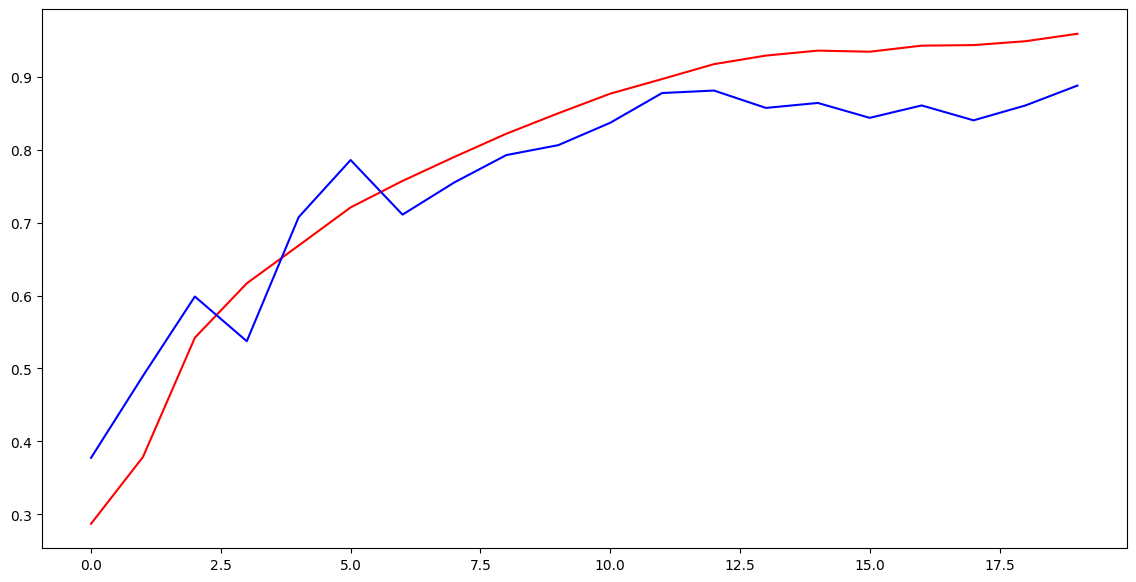

In [26]:
#model.save('braintumor.h5')
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="TRAINING ACCURACY")
plt.plot(epochs,val_acc,'b',label="VALIDATION ACCURACY")
plt.show()

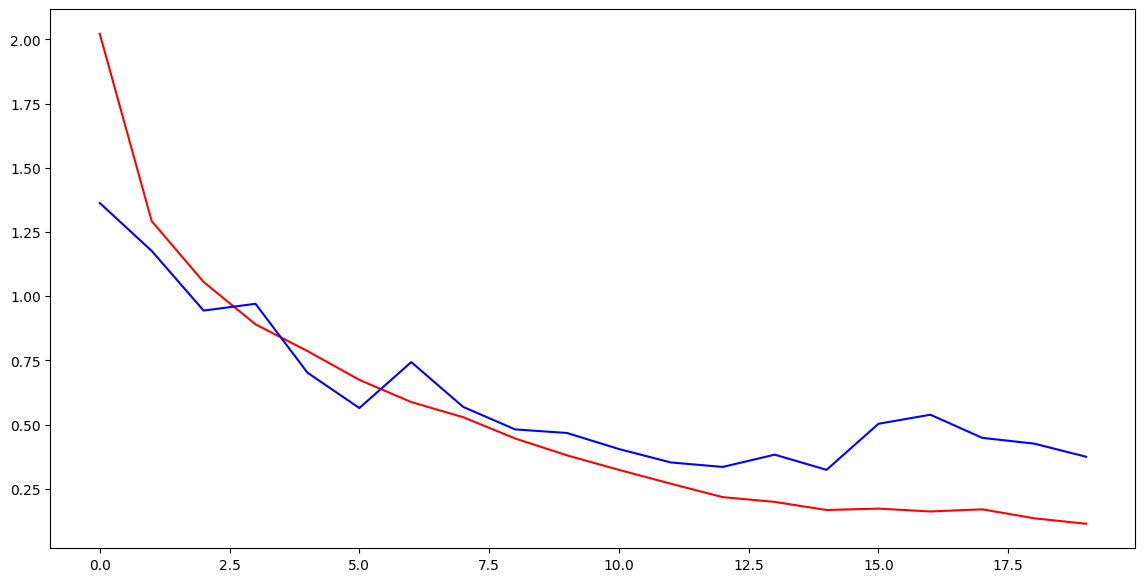

In [28]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs=range(len(loss))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="TRAINING LOSS")
plt.plot(epochs,val_loss,'b',label="VALIDATION LOSS")
plt.show()

In [32]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(86).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [33]:
img_array=img_array.reshape(1,150,150,3)

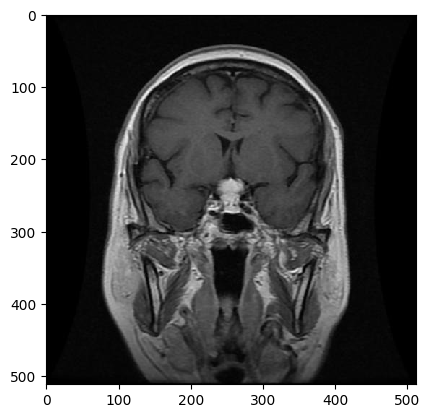

In [35]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(86).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [36]:
a=model.predict(img_array)
indices=a.argmax()
# 3 belongs to pitutitory 
# check from labels list 
indices

1/1 [==============================] - 0s 247ms/step


3